In [1]:
import ROOT as r

Welcome to JupyROOT 6.28/04


In [2]:
m = r.RooRealVar("m","e^{+} e^{-} Inv. Mass (in GeV)",60,120,"GeV")

In [3]:
inputfile = r.TFile("histfile1.root","READ")
inputfile.ls()

TFile**		histfile1.root	
 TFile*		histfile1.root	
  KEY: TH1F	histogram;1	Mass of Z boson


In [4]:
heg = inputfile.Get("histogram")

In [5]:
dh = r.RooDataHist("dh","dh",r.RooArgList(m),r.RooFit.Import(heg))

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(dh): fit range of variable m expanded to nearest bin boundaries: [60,120] --> [59.8,115]


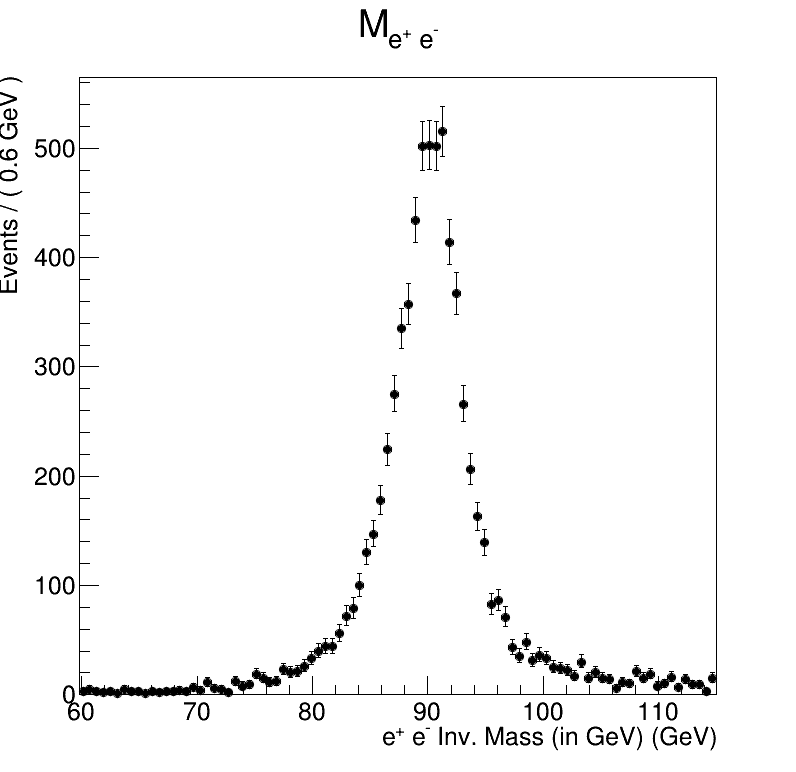

In [16]:
frame = m.frame(r.RooFit.Title("M_{e^{+} e^{-}}"))
dh.plotOn(frame,r.RooFit.Name("dh"))
c1 = r.TCanvas("c1","example",800,800)
frame.Draw()
c1.Draw()

In [8]:
mBW = r.RooRealVar("mBW","mean BW",90,80,100)                                                              
sBW = r.RooRealVar("sBW","sigma BW",5,0.0,10)                                                            
brietwigner = r.RooBreitWigner("bw","bw",m,mBW,sBW)                                                             
                                                                                                                
mCB = r.RooRealVar("mCB", "mCB" ,0.1,0,1.0)                                                                       
sCB = r.RooRealVar("sCB", "sCB" ,2.3 , 0.0, 5.0)                                                               
nCB = r.RooRealVar("nCB","nCB", 1,0.,5.0)                                                                        
#RooRealVar nCB("nCB","", 1.42,0.001,50)                                                                    
alphaCB = r.RooRealVar("alphaCB","", 0.93,0.1,5.0)                                                               
#RooRealVar alphaCB("alphaCB","", 0.93,0.1 , 50)                                                            
cball = r.RooCBShape("cball","cball",m,mCB,sCB, alphaCB, nCB)
bwcball = r.RooFFTConvPdf("BWxcball","BW(X)cball",m,brietwigner, cball)

In [9]:
lambd = r.RooRealVar("lambd", "slope", -0.1, -5.0, 0.0)                                                        
bkgshape = r.RooExponential("expo", "exponential PDF", m, lambd)

In [10]:
nsig = r.RooRealVar("nsig","signal events",6000,0,10000);                                                      
nbkg = r.RooRealVar("nbkg","signal background events",2000,0,10000);                                            
                                                                                                                
model = r.RooAddPdf("model","bwcball+shape",r.RooArgList(bwcball,bkgshape),r.RooArgList(nsig,nbkg)) ;                   


In [11]:
a= model.fitTo(dh,r.RooFit.Extended(),r.RooFit.Range(60,120), r.RooFit.Save())

[#1] INFO:Eval -- RooRealVar::setRange(m) new range named 'fit' created with bounds [60,120]
[#1] INFO:Eval -- RooRealVar::setRange(m) new range named 'fit_nll_model_dh' created with bounds [60,120]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_dh) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(m) new range named 'refrange_fft_BWxcball' created with bounds [59.8,115]
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x651c93262500 with pdf bw_CONV_cball_CACHE_Obs[m]_NORM_m for nset (m) with code 0
[#1] INFO:NumericIntegration -- RooRealIntegral::init(BWxcball_Int[m|fit]_Norm[m]) using numeric integrator RooIntegrator1D to calculate Int(m)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(BWxcball_Int[m|fit]_Norm[m]) using numeric integrator RooIntegrator1D to calculate Int(m)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Caching -- RooAbsCach

In [12]:
a.floatParsFinal().at(0).GetName ()

'alphaCB'

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in a subrange and no explicit Range() and NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attribute: <pdf>.removeStringAttribute("fitrange");
	- Explicitly specify the plotting range: Range("<rangeName>").
	- Explicitly specify where to compute the normalisation: NormRange("<rangeName>").
	The default (full) range can be denoted with Range("") / NormRange("").
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_dh'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_dh'
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x651c9410dfd0 with pdf bw_CONV_cball_CACHE_Obs[m]_NORM_m for nset (m) with code 0 from preexisting content.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[m|fit_nll_model_dh]_Norm[m]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


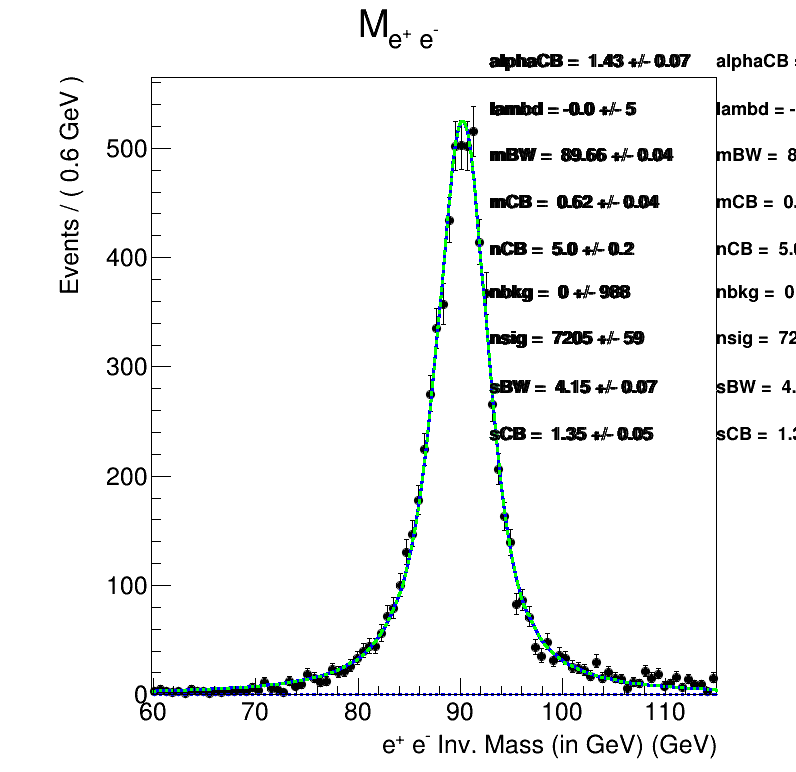

In [22]:
ras_bkgshape = r.RooArgSet(bkgshape)
ras_bwcball = r.RooArgSet(bwcball)
model.plotOn(frame,r.RooFit.Name("model"));                                                                            
model.plotOn(frame,r.RooFit.Components(ras_bkgshape),r.RooFit.LineStyle(r.kDashed)) ;                                                    
model.plotOn(frame,r.RooFit.Components(ras_bwcball),r.RooFit.LineColor(r.kGreen),r.RooFit.LineStyle(r.kDashed)) ;                                
model.paramOn(frame,r.RooFit.Layout(0.60,0.90),r.RooFit.Format("NEU",r.RooFit.AutoPrecision(1))) ;                                       
frame.getAttText().SetTextSize(0.026) ;                                                                     
                                                                                                                
c = r.TCanvas("c","Inv. Mass Hist.",800,800) ;                                                     
c.cd();                                                                                                      
r.gPad.SetLeftMargin(0.19) ; frame.GetYaxis().SetTitleOffset(1.8) ;                                          
r.gPad.SetRightMargin(0.10) ; frame.GetXaxis().SetTitleOffset(1.2) ;                                         
                                                                                                                
frame.Draw();                                                                                                
c.Draw()                                                                                                                                                                                    


In [14]:
c.SaveAs("fitting.pdf")

Info in <TCanvas::Print>: pdf file fitting.pdf has been created
